# Differentially Flatness of Slung-Load System

Dynamic Model (Newton-Euler):

$$
M \ddot{\vec{x}} = f R \vec{e}_z - m g \vec{e}_z + T\vec{p} \\
m \ddot{\vec{x}}_L = -T\vec{p} - m g \vec{e}_z \\
I \vec{\omega} + \vec{\omega} \times I \vec{\omega} = \vec{\tau}
$$

Geometric relationship:

$$
\vec{x} = \vec{x}_L - L\vec{p}
$$

## Step 1: $\vec{x}_L \rightarrow \vec{x}$

**Lemma 1:** From $\vec{x}_L$ and its higher-order derivatives, we can determine $\vec{x}$ and its higher-order derivatives. The $nth$ derivative of $\vec{x}$ is determined from the $(n+2)th$ derivative of $\vec{x}_L$ and the lower order derivatives

**Proof:**

First, determine the tension force:

$$
T\vec{p} = - m \ddot{\vec{x}}_L - m g \vec{e}_z \\
\vec{p} = \frac{T\vec{p}}{\|{T\vec{p}}\|} \\
T = T\vec{p} \cdot \vec{p}
$$

Then $\vec{x}$ is determined from the geometric relationship and its derivatives:

$$
\vec{x} = \vec{x}_L - L\vec{p} \\
\dot{\vec{x}} = \dot{\vec{x}}_L - L\dot{\vec{p}} \\
\ddot{\vec{x}} = \ddot{\vec{x}}_L - L\ddot{\vec{p}} \\
\vdots \\
\vec{x}^{(n)} = {\vec{x}_L}^{(n)} - L\vec{p}^{(n)}
$$

$\dot{\vec{p}}$ is found by derivating the second equation of the dynamic model:

$$
\dot{\vec{p}} = -\frac{(m\dddot{\vec{x}}_L + \dot{T}\vec{p})}{T}
$$

$\dot{T}$ can be determined by derivating $T$ obtained directly from the second equation of the dynamic model:

$$
T = \|-m\ddot{\vec{x}}_L -mg\vec{e}_z \| = \sqrt{m^2\left[{\ddot{\vec{x}}_L}^2+{\ddot{\vec{y}}_L}^2 \left( {\ddot{\vec{z}}_L}^2 + g\right) \right]}
$$

Note that, by derivating the two equations above, $\vec{p}^{(n)}$ will depend on the $(n+2)th$ derivative of $\vec{x}_L$ and the lower order derivatives.

It follows the expressions for $\vec{p}^{(n)}$ and $T^{(n)}$ up to the fourth order.


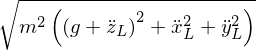

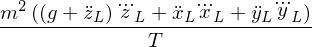

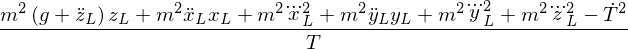

((-m**2*((g + z_L'')*z_L'''' + x_L''*x_L'''' + x_L'''**2 + y_L''*y_L'''' + y_L'''**2 + z_L'''**2) + T'**2)*T' + (m**2*(g + z_L'')*z_L''''' + m**2*x_L''*x_L''''' + 3*m**2*x_L'''*x_L'''' + m**2*y_L''*y_L''''' + 3*m**2*y_L'''*y_L'''' + 3*m**2*z_L'''*z_L'''' - 2*T'*T'')*T)/T**2
(2*(m**2*((g + z_L'')*z_L'''' + x_L''*x_L'''' + x_L'''**2 + y_L''*y_L'''' + y_L'''**2 + z_L'''**2) - T'**2)*T'**2 + (-m**2*((g + z_L'')*z_L'''' + x_L''*x_L'''' + x_L'''**2 + y_L''*y_L'''' + y_L'''**2 + z_L'''**2)*T'' - 2*m**2*((g + z_L'')*z_L''''' + x_L''*x_L''''' + 3*x_L'''*x_L'''' + y_L''*y_L''''' + 3*y_L'''*y_L'''' + 3*z_L'''*z_L'''')*T' + 5*T'**2*T'')*T + (m**2*(g + z_L'')*z_L'''''' + m**2*x_L''*x_L'''''' + 4*m**2*x_L'''*x_L''''' + 3*m**2*x_L''''**2 + m**2*y_L''*y_L'''''' + 4*m**2*y_L'''*y_L''''' + 3*m**2*y_L''''**2 + 4*m**2*z_L'''*z_L''''' + 3*m**2*z_L''''**2 - 2*T'*T''' - 2*T''**2)*T**2)/T**3


In [8]:
from sympy import *
from sympy.physics.mechanics import *

# from math import *

init_vprinting()

t = symbols('t')

xL, yL, zL, T, p = dynamicsymbols('x_L y_L z_L T p')

# Physical parameters
m, M, l, g, I = symbols('m M l g I')

xLddot = diff(xL, t, 2)
yLddot = diff(yL, t, 2)
zLddot = diff(zL, t, 2)

T_exp = sqrt((-m*xLddot)**2 + (-m*yLddot)**2 + (-m*zLddot-m*g)**2)
Tdot_exp = diff(T_exp, t).subs(T_exp, T)
Tddot_exp = diff(Tdot_exp, t).subs(Tdot_exp, diff(T))
T3dot_exp = diff(Tddot_exp, t).subs(Tddot_exp, diff(T, t, 2))
T4dot_exp = diff(T3dot_exp, t).subs(T3dot_exp, diff(T, t, 3))

display(simplify(T_exp))
display(simplify(Tdot_exp))
display(simplify(Tddot_exp))
vprint(simplify(T3dot_exp))
vprint(simplify(T4dot_exp))

In [9]:
# In the following expressions, xL is a vector

pdot_exp  = (-m*diff(xL,t,3) - diff(T,t)*p)/T
pddot_exp = diff(pdot_exp,t).subs(pdot_exp, diff(p))
p3dot_exp = diff(pddot_exp,t).subs(pddot_exp, diff(p,t,2))
p4dot_exp = diff(p3dot_exp,t).subs(p3dot_exp, diff(p,t,3))

vprint(simplify(pdot_exp))
vprint(simplify(pddot_exp))
vprint(simplify(p3dot_exp))
vprint(simplify(p4dot_exp))

-(m*x_L''' + p*T')/T
-(m*x_L'''' + p*T'' + 2*T'*p')/T
((m*x_L'''' + p*T'' + 2*T'*p')*T' - (m*x_L''''' + p*T''' + 2*T'*p'' + 3*T''*p')*T)/T**2
(-2*(m*x_L'''' + p*T'' + 2*T'*p')*T'**2 + ((m*x_L'''' + p*T'' + T'*p')*T'' + 2*(m*x_L''''' + p*T''' + T'*p'' + 2*T''*p')*T' + 2*T'**2*p'' + 3*T'*T''*p')*T - (m*x_L'''''' + p*T'''' + 2*T'*p''' + 5*T''*p'' + 4*T'''*p')*T**2)/T**3
